In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True, as_frame=True)

In [26]:
# Selecionando apenas petal width (cm) e pegando apenas os dados de target 0 e 1
# Esse filtro é para se adaptar aos parâmetros da regressão logística

X = X.loc[y.isin([0, 1]), 'petal width (cm)'].values

y = y[y.isin([0, 1])].values

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

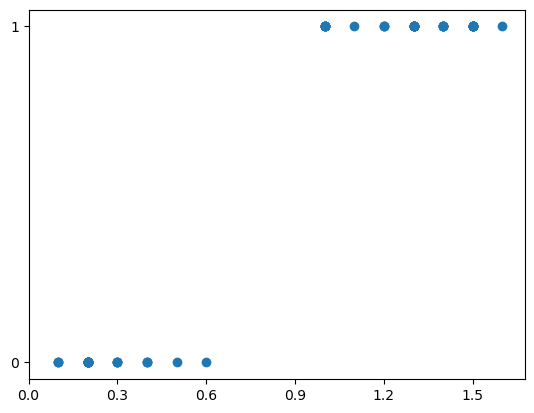

In [28]:
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.set(yticks=[0, 1], xticks=[0, 0.3, 0.6, 0.9, 1.2, 1.5])
plt.show()

In [29]:
# Realizando Regressão com treino dando reshape nos dados
clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1, 1), y_train)

In [34]:
# Armazenando o coeficiente angular para gerar o y do expit
# o [0][0] é porquê o coef_ fica dentro de uma lista dentro de outra lista
w1 = clf.coef_[0][0]

In [35]:
# Armazenando o Coeficiente linear para gerar o gráfico do expit
# intercept_ só fica dentro de uma lista
w0 = clf.intercept_[0] 

In [36]:
# importando a função que gera o gráfico da curva da regressão logística
from scipy.special import expit

# gerando pontos lineares equivalentes para imprimir no expit
valores_x = np.linspace(X_train.min(), X_train.max(), 100)
valores_x

array([0.1       , 0.11515152, 0.13030303, 0.14545455, 0.16060606,
       0.17575758, 0.19090909, 0.20606061, 0.22121212, 0.23636364,
       0.25151515, 0.26666667, 0.28181818, 0.2969697 , 0.31212121,
       0.32727273, 0.34242424, 0.35757576, 0.37272727, 0.38787879,
       0.4030303 , 0.41818182, 0.43333333, 0.44848485, 0.46363636,
       0.47878788, 0.49393939, 0.50909091, 0.52424242, 0.53939394,
       0.55454545, 0.56969697, 0.58484848, 0.6       , 0.61515152,
       0.63030303, 0.64545455, 0.66060606, 0.67575758, 0.69090909,
       0.70606061, 0.72121212, 0.73636364, 0.75151515, 0.76666667,
       0.78181818, 0.7969697 , 0.81212121, 0.82727273, 0.84242424,
       0.85757576, 0.87272727, 0.88787879, 0.9030303 , 0.91818182,
       0.93333333, 0.94848485, 0.96363636, 0.97878788, 0.99393939,
       1.00909091, 1.02424242, 1.03939394, 1.05454545, 1.06969697,
       1.08484848, 1.1       , 1.11515152, 1.13030303, 1.14545455,
       1.16060606, 1.17575758, 1.19090909, 1.20606061, 1.22121

In [42]:
# Valores para gerar a curva do gráfico
valores_y = expit(w1 * valores_x + w0)
valores_y_treino = expit(w1 * X_train + w0)

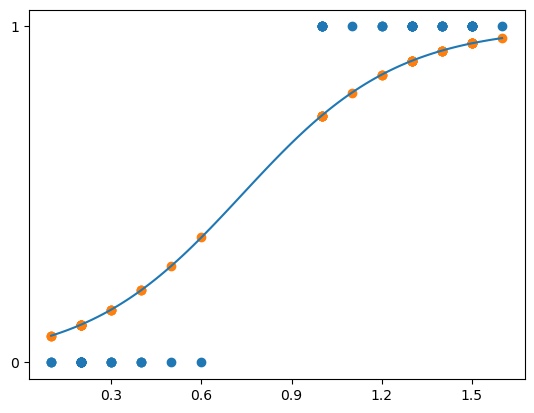

In [43]:
# O linspace acima foi puramente visual e esse gráfico é pra comrpeender o visual da regressão
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.set(yticks=[0, 1], xticks=[0, 0.3, 0.6, 0.9, 1.2, 1.5])
ax.plot(valores_x, valores_y)
ax.scatter(X_train, valores_y_treino)
plt.show()

# Compreensão do Gráfico
Apesar de ser um pouco complicado de compreender, o gráfico da regressão logística é bem simples. Em azul, temos os pontos reais do target e em laranja sua posição equivalente na curva da regressão logística.

### Mas o que esse ponto laranja faz?
Basicamente a distância entre o ponto azul e seu equivalente alaranjado na mesma posição em relação ao eixo X do gráfico é a probabilidade dele ser ou não um determinado valor. Por exemplo, digamos que quando X é 0.3 o ponto laranja esteja há 0.73469089 de distância para quando y é igual a 1 e há uma distância de 0.26530911 para quando y é igual a 0. O que esses números significam?

-  Quando X = 0.3 existe uma probabilidade de 73,47% do valor ser 0
-  Quando X = 0.3 existe uma probabilidade de 26,53% do valor ser 1

As distâncias do ponto laranja para os valores de y, indicam a probabilidade de um determinado valor ser ele ou não. É assim que a regressão logística trabalha.

**Esses pontos laranjas afinal, são o quê?**

Eles na verdade são os valores de y após você aplicar a função matemática `expit()` em X_train. A função de `expit()` realiza o cálculo de uma curva que é a base da regressão logística (para mais informações, é bom visitar a documentação do `scipy.special.expit`).

Os pontos laranja são o posicionamento dos dados com relação a y quando você passa o X_train para o gráfico

> Atenção! Para uso em predições de probabilidade temos que usar o X_test! É que esse gráfico é um exemplo prátivo de como a regressão lotgística funciona.

In [46]:
clf.predict_proba(X_train.reshape(-1, 1))[0:5]

array([[0.88718204, 0.11281796],
       [0.26530911, 0.73469089],
       [0.78449692, 0.21550308],
       [0.05001742, 0.94998258],
       [0.07182627, 0.92817373]])

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(X_test.reshape(-1, 1))

confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[19,  0],
       [ 0, 14]], dtype=int64)

In [48]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        14

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

